In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("mymoviedb.csv" , lineterminator = "\n")

In [20]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [24]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [26]:
df.duplicated().sum()

0

In [28]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [38]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"])

In [34]:
print(df["Release_Date"].dtypes)

datetime64[ns]


In [42]:
df["Release_Date"]=df["Release_Date"].dt.year


In [44]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [56]:
cols = ["Overview" , "Original_Language" , "Poster_Url" ]
df.drop(cols, axis=1 ,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [58]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [ ]:
categorizing Vote_Average column

We would cut the Vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() provided above.



In [129]:
def categorize_col(df, col, labels):
    edges = [
    df[col].describe()['min'],
    df[col].describe()['25%'],
    df[col].describe()['50%'],
    df[col].describe()['75%'],
    df[col].describe()['max']
]
    df[col] = pd.cut(df[col], edges , labels=labels, duplicates= 'drop')
    return df

In [131]:
def categorize_col(df, col, labels):
    desc = df[col].describe()
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [133]:
 df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]","Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,"(7.1, 10.0]","Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,"(5.9, 6.5]",Thriller
3,2021,Encanto,2402.201,5076,"(7.1, 10.0]","Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,"(6.5, 7.1]","Action, Adventure, Thriller, War"


In [137]:
df["Vote_Average"].value_counts()

Vote_Average
(0.0, 5.9]     2467
(7.1, 10.0]    2450
(6.5, 7.1]     2412
(5.9, 6.5]     2398
Name: count, dtype: int64

In [139]:
df.dropna(inplace = True)

In [141]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [143]:
df["Genre"] = df["Genre"].str.split(",")

In [145]:
df=df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]",Action
1,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]",Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]",Science Fiction
3,2022,The Batman,3827.658,1151,"(7.1, 10.0]",Crime
4,2022,The Batman,3827.658,1151,"(7.1, 10.0]",Mystery


In [147]:
#casting genre in category 

In [163]:
df["Genre"] = df["Genre"].astype("category")

In [165]:
df["Genre"].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [167]:
###Data visualtion 

In [171]:
sns.set_style("whitegrid")

What is the most frequent genre of movies relesaed on netflix

In [176]:
df["Genre"].describe()

count         25552
unique           38
top        Thriller
freq           1960
Name: Genre, dtype: object

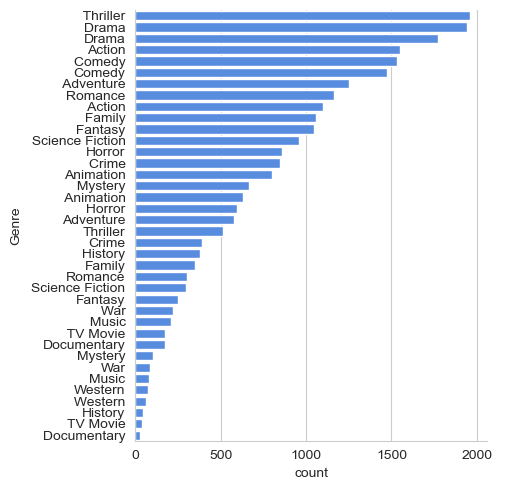

In [180]:
sns.catplot(y = "Genre", data = df, kind = "count", order = df["Genre"].value_counts().index, color= "#4287f5")
plt.show()

Which has highest vote in vote average column

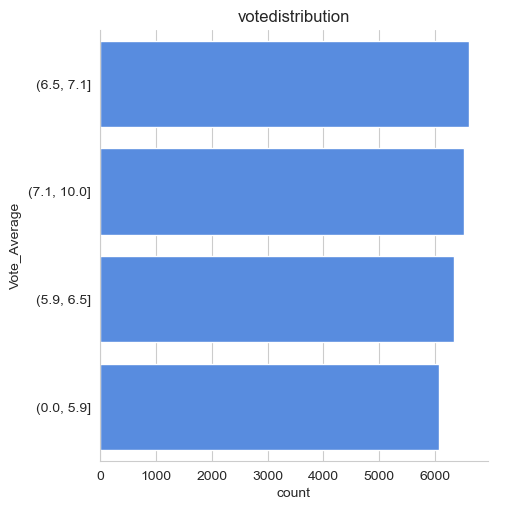

In [189]:
sns.catplot(y = "Vote_Average", data=df,kind="count",order=df["Vote_Average"].value_counts().index,color= "#4287f5")
plt.title("votedistribution")
plt.show()

What movie got the highesta popularity and what is it genre


In [198]:
df[df["Popularity"]==df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,"(6.5, 7.1]",Music
25547,2021,The United States vs. Billie Holiday,13.354,152,"(6.5, 7.1]",Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,"(6.5, 7.1]",History
25549,1984,Threads,13.354,186,"(7.1, 10.0]",War
25550,1984,Threads,13.354,186,"(7.1, 10.0]",Drama
25551,1984,Threads,13.354,186,"(7.1, 10.0]",Science Fiction


What movie got the highesta popularity and what is it genre

In [196]:
df[df["Popularity"]==df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]",Action
1,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]",Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,"(7.1, 10.0]",Science Fiction


which year has the most filmmed movies

Text(0.5, 1.0, 'Release date distribution')

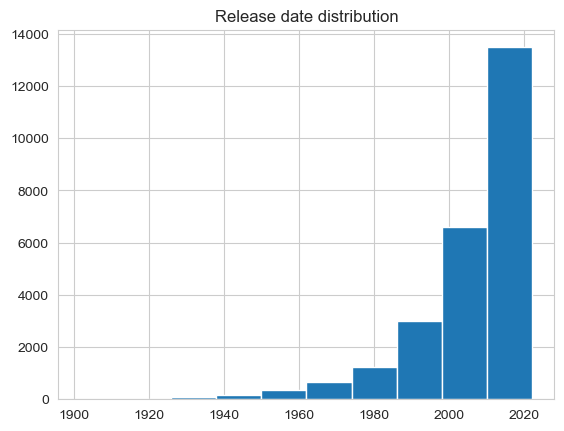

In [202]:
df["Release_Date"].hist()
plt.title("Release date distribution")

Conclusion

Q1: What is the most frequent genre in the dataset?

Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2: What genres has highest votes?

we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5%

mov

Q3: What movie got the highest popularity? what's its genre?

Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

Q3: What movie got the lowest popularity? what's its genre?

The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi and history
